In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mp1
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from skimage.io import imread
from skimage.transform import resize
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


/Users/rohan/Desktop/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Part one

## Data loading 

In [2]:
# Loading the datasets from .npy files
data_set1 = np.load("/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_X.npy")
data_set2 = np.load("/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_Y.npy")

In [3]:
# Reshaping the data to 2D format
data_set1 = data_set1.reshape(-1, data_set1.shape[-1])
data_set2 = data_set2.reshape(-1, data_set2.shape[-1])

In [4]:
# Converting to pandas DataFrames
data_set1_columns = [f"feature_{i+1}" for i in range(data_set1.shape[1]-1)] + ['target']
data_set2_columns = [f"feature_{i+1}" for i in range(data_set2.shape[1]-1)] + ['target']
data_set1 = pd.DataFrame(data_set1, columns=data_set1_columns)
data_set2 = pd.DataFrame(data_set2, columns=data_set2_columns)

In [5]:
#info about the datasets
print("Data Set 1:")
print(data_set1.info())

print("\nData Set 2:")
print(data_set2.info())

Data Set 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16524 entries, 0 to 16523
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  16524 non-null  float64
dtypes: float64(1)
memory usage: 129.2 KB
None

Data Set 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 204 entries, feature_1 to target
dtypes: float64(204)
memory usage: 1.7 KB
None


## Data visualization and exploration

In [6]:
X = np.load("/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_X.npy")
Y = np.load("/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_Y.npy")

In [7]:
X = np.squeeze(X , axis= 3 )
X.shape

(204, 9, 9)

In [8]:
X = np.reshape(X, (204,81))

In [9]:
X.shape

(204, 81)

In [10]:
Y.shape

(204,)

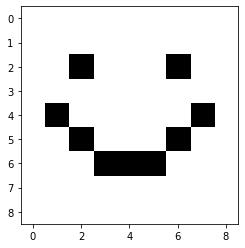

In [11]:
some_digit = X[0]
some_digit_image = some_digit.reshape(9,9)
plt.imshow(some_digit_image,cmap=mp1.cm.binary)
plt.show()

In [12]:
def plot_digits(instances, images_per_row, **options):
    size = int(np.sqrt(instances.shape[1]))
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    fig, axs = plt.subplots(n_rows, images_per_row, figsize=(images_per_row, n_rows))
    for i in range(n_rows):
        for j in range(images_per_row):
            image_idx = i * images_per_row + j
            if image_idx < len(instances):
                image = instances[image_idx].reshape(size, size)
                axs[i, j].imshow(image, cmap="binary")
                axs[i, j].axis("off")
            else:
                axs[i, j].axis("off")
    plt.show()

<Figure size 360x360 with 0 Axes>

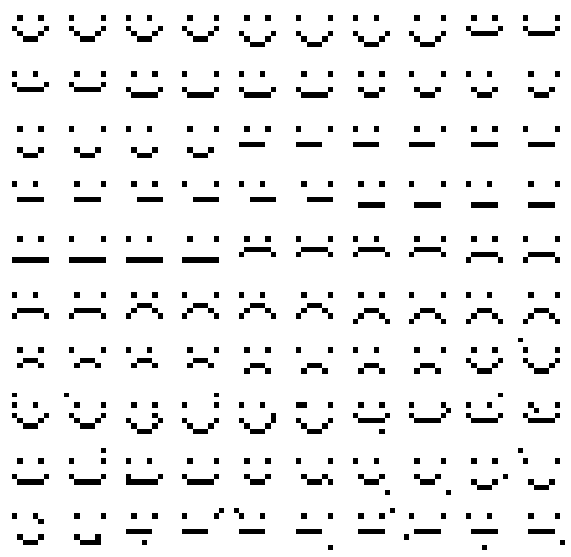

In [13]:
plt.figure(figsize=(5, 5))
example_images = X[:100]  # X containing image data
plot_digits(example_images, images_per_row=10)
plt.show()

In [14]:
# Preprocessing the image_data to extract relevant features
X = np.load('/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_X.npy')   
Y = np.load('/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_Y.npy') 
image_means = np.mean(X, axis=(1,2,3))   

In [15]:
#Grouping the extracted features based on the labels
grouped_data = {}
for label in np.unique(Y):
    grouped_data[label] = image_means[Y == label]

In [16]:
#summary statistics for each group (optional)
mean_values = {label: np.mean(values) for label, values in grouped_data.items()}

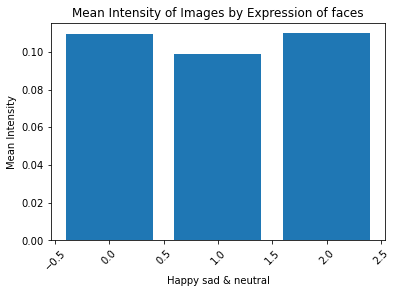

In [17]:
#bar graph
plt.bar(mean_values.keys(), mean_values.values())
plt.xlabel('Happy sad & neutral')
plt.ylabel('Mean Intensity')
plt.title('Mean Intensity of Images by Expression of faces')
plt.xticks(rotation=45) 
plt.show()

In [18]:
data_set1 = pd.DataFrame({'feature_1': image_means, 'feature_2': Y})

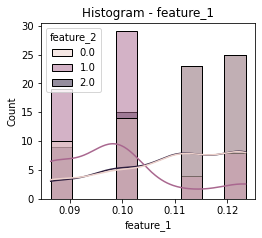

In [19]:
# Histograms
plt.figure(figsize=(10, 6))
for i, col in enumerate(data_set1.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.histplot(data_set1, x=col, hue='feature_2', kde=True)
    plt.title(f"Histogram - {col}")
plt.tight_layout()
plt.show()

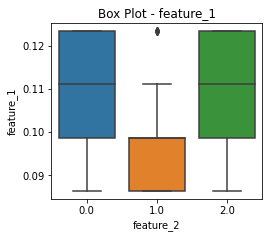

In [20]:
# Box plots
plt.figure(figsize=(10, 6))
for i, col in enumerate(data_set1.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='feature_2', y=col, data=data_set1)
    plt.title(f"Box Plot - {col}")
plt.tight_layout()
plt.show()

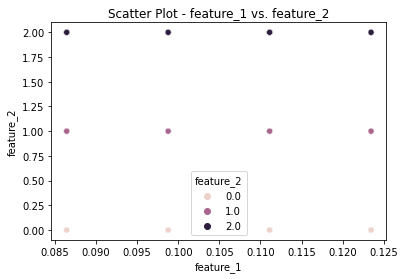

In [21]:
# Scatter plot of two features
sns.scatterplot(data=data_set1, x='feature_1', y='feature_2', hue='feature_2')
plt.title("Scatter Plot - feature_1 vs. feature_2")
plt.show()

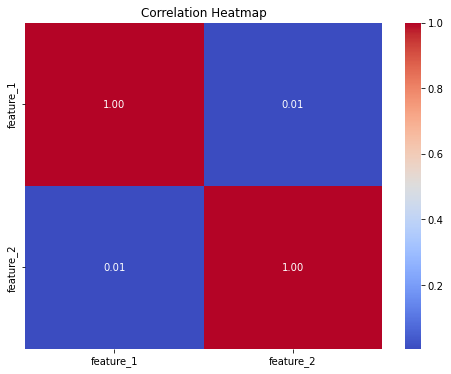

In [22]:
# Correlation heatmap
correlation_matrix = data_set1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Missing values, errors and outliers

In [23]:
# Checking for missing values in Dataset 1 and 2
print("Data Set 1 - Missing Values:")
print(data_set1.isnull().sum())

print("\nData Set 2 - Missing Values:")
print(data_set2.isnull().sum())

Data Set 1 - Missing Values:
feature_1    0
feature_2    0
dtype: int64

Data Set 2 - Missing Values:
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_200    0
feature_201    0
feature_202    0
feature_203    0
target         0
Length: 204, dtype: int64


In [24]:
# Outlier removal using Z-score method
z_scores = stats.zscore(data_set1[data_set1_columns[:-1]])
abs_z_scores = np.abs(z_scores)
outlier_threshold = 3
data_set1_cleaned = data_set1[(abs_z_scores < outlier_threshold).all(axis=1)]

z_scores = stats.zscore(data_set2[data_set1_columns[:-1]])
abs_z_scores = np.abs(z_scores)
outlier_threshold = 3
data_set2_cleaned = data_set2[(abs_z_scores < outlier_threshold).all(axis=1)]

## Naïve Bayes Classifier and major metrics

In [87]:
# Load the image dataset (assuming 'images.npy' contains the image data)
images = np.load('/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_X.npy')

# Resize the images to a common size (e.g., 64x64) for consistency
resized_images = [resize(img, (64, 64)) for img in images]

# Convert the list of resized images to a NumPy array
X = np.array(resized_images)
# Load the label dataset (assuming 'labels.npy' contains the label data)
labels = np.load('/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_Y.npy')

# Convert labels to a Pandas DataFrame
labels_df = pd.DataFrame(labels, columns=['label'])


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, labels_df['label'], test_size=0.2, random_state=42)


In [89]:
# As Naïve Bayes expects 1D input, we need to flatten and reshape the image data
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)


In [102]:
from sklearn.naive_bayes import MultinomialNB 
nb_classifier = MultinomialNB()
# nb_classifier = GaussianNB()
nb_classifier.fit(X_train_flattened, y_train)

y_pred = nb_classifier.predict(X_test_flattened)
y_pred_prob = nb_classifier.predict_proba(X_test_flattened)


In [91]:
accuracy = accuracy_score(y_test, y_pred)

In [94]:
try:
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tp_rate = tp / (tp + fn)
    fp_rate = fp / (fp + tn)
    precision = tp / (tp + fp)
    recall = tp_rate
    f1_score = 2 * (precision * recall) / (precision + recall)
except ValueError:
    # For multiclass classification
    confusion = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    

Confusion Matrix:
[[9 6 0]
 [0 9 0]
 [3 9 5]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67        15
         1.0       0.38      1.00      0.55         9
         2.0       1.00      0.29      0.45        17

    accuracy                           0.56        41
   macro avg       0.71      0.63      0.56        41
weighted avg       0.77      0.56      0.55        41



In [104]:
print("Shape of X_test:", X_test.shape)
X_test_2d = X_test.reshape(-1, 1)

Shape of X_test: (41, 64, 64, 1)


In [106]:
# y_pred = nb_classifier.predict(X_test)

In [96]:
# Step 5: Draw conclusions
print("Accuracy:", accuracy)
if 'tp_rate' in locals():
    print("True Positive Rate (TP rate):", tp_rate)
    print("False Positive Rate (FP rate):", fp_rate)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
# print("ROC Area:", roc_area)

Accuracy: 0.5609756097560976
True Positive Rate (TP rate): 0.8
False Positive Rate (FP rate): 0.3333333333333333
Precision: 0.4444444444444444
Recall: 0.8
F1 Score: 0.5714285714285714


In [83]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67        15
         1.0       0.38      1.00      0.55         9
         2.0       1.00      0.29      0.45        17

    accuracy                           0.56        41
   macro avg       0.71      0.63      0.56        41
weighted avg       0.77      0.56      0.55        41



# Part Two

In [107]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler


In [56]:
image_path = ['/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_X.npy']
labels = ['/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_Y.npy'] 

In [108]:
def extract_color_histogram(image_path):
    # Read the image in BGR format (default format for OpenCV)
    image = cv2.imread(image_path)

    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Ensure the image has three color channels (RGB)
    if image_rgb.shape[2] != 3:
        raise ValueError("Input image must have three color channels (RGB).")

    hist = cv2.calcHist([image_rgb], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist


In [60]:
features = np.array([extract_color_histogram(image_path) for image_path in image_paths if extract_color_histogram(image_path) is not None])



error: OpenCV(4.8.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [59]:
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features)

NameError: name 'features' is not defined

In [41]:
ari_score = adjusted_rand_score(ground_truth_labels, clusters)
print(f"Adjusted Rand Index: {ari_score}")

NameError: name 'ground_truth_labels' is not defined

In [42]:
num_images_per_cluster = 5
for cluster_id in range(k):
    cluster_indices = np.where(clusters == cluster_id)[0]
    selected_indices = cluster_indices[:num_images_per_cluster]

    plt.figure(figsize=(15, 3))
    for idx, img_idx in enumerate(selected_indices):
        plt.subplot(1, num_images_per_cluster, idx + 1)
        plt.imshow(images[img_idx])
        plt.title(f"Cluster: {cluster_id}")
        plt.axis('off')

    plt.show()

NameError: name 'clusters' is not defined

# Part Three

# Part Four

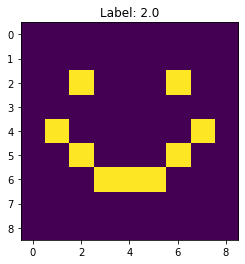

2023-07-27 13:29:57.799595: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ValueError: Exception encountered when calling layer "max_pooling2d_1" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_1/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,64].

Call arguments received by layer "max_pooling2d_1" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 64), dtype=float32)

In [80]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

images = np.load("/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_X.npy")
labels = np.load("/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_Y.npy")

plt.imshow(images[0])
plt.title("Label: {}".format(labels[0]))
plt.show()

num_classes = 10 
# Normalizing the image data to values between 0 and 1
images = images.astype("float32") / 255.0

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Defining the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(8,8, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

# Compiling the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training the model
epochs = 10
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

